<a href="https://colab.research.google.com/github/jedrexd/WTUM_11_2022/blob/main/Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import BayesianRidge, ARDRegression, LinearRegression, Ridge
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV, train_test_split

In [37]:
!git clone https://github.com/jedrexd/WTUM_11_2022

fatal: destination path 'WTUM_11_2022' already exists and is not an empty directory.


# Data Understanding

## Opis

In [38]:
df = pd.read_csv("/content/WTUM_11_2022/train.csv", header=0)
df = df.iloc[:,1:]
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [39]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [40]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Brakujące wartości, wartości odstające, skalowanie

Informacje o kolumnie 21: RoofStyle
Czy są NaNy: False
Unikatowe wartości:
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


Informacje o kolumnie 22: RoofMatl
Czy są NaNy: False
Unikatowe wartości:
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']


Informacje o kolumnie 23: Exterior1st
Czy są NaNy: False
Unikatowe wartości:
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


Informacje o kolumnie 24: Exterior2nd
Czy są NaNy: False
Unikatowe wartości:
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']


Informacje o kolumnie 25: MasVnrType
Czy są NaNy: True
Unikatowe wartości:
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]


Informacje o kolumnie 26: MasVnrArea
Czy są NaNy: True
Unikatowe wartości:
[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 

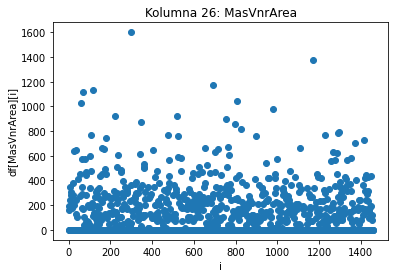



Informacje o kolumnie 27: ExterQual
Czy są NaNy: False
Unikatowe wartości:
['Gd' 'TA' 'Ex' 'Fa']


Informacje o kolumnie 28: ExterCond
Czy są NaNy: False
Unikatowe wartości:
['TA' 'Gd' 'Fa' 'Po' 'Ex']


Informacje o kolumnie 29: Foundation
Czy są NaNy: False
Unikatowe wartości:
['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']


Informacje o kolumnie 30: BsmtQual
Czy są NaNy: True
Unikatowe wartości:
['Gd' 'TA' 'Ex' nan 'Fa']


Informacje o kolumnie 31: BsmtCond
Czy są NaNy: True
Unikatowe wartości:
['TA' 'Gd' nan 'Fa' 'Po']


Informacje o kolumnie 32: BsmtExposure
Czy są NaNy: True
Unikatowe wartości:
['No' 'Gd' 'Mn' 'Av' nan]


Informacje o kolumnie 33: BsmtFinType1
Czy są NaNy: True
Unikatowe wartości:
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


Informacje o kolumnie 34: BsmtFinSF1
Czy są NaNy: False
Unikatowe wartości:
[ 706  978  486  216  655  732 1369  859    0  851  906  998  737  733
  578  646  504  840  188  234 1218 1277 1018 1153 1213  731  643  967
  747  280  179  456 

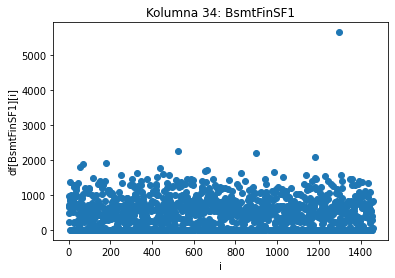



Informacje o kolumnie 35: BsmtFinType2
Czy są NaNy: True
Unikatowe wartości:
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


Informacje o kolumnie 36: BsmtFinSF2
Czy są NaNy: False
Unikatowe wartości:
[   0   32  668  486   93  491  506  712  362   41  169  869  150  670
   28 1080  181  768  215  374  208  441  184  279  306  180  580  690
  692  228  125 1063  620  175  820 1474  264  479  147  232  380  544
  294  258  121  391  531  344  539  713  210  311 1120  165  532   96
  495  174 1127  139  202  645  123  551  219  606  612  480  182  132
  336  468  287   35  499  723  119   40  117  239   80  472   64 1057
  127  630  128  377  764  345 1085  435  823  500  290  324  634  411
  841 1061  466  396  354  149  193  273  465  400  682  557  230  106
  791  240  547  469  177  108  600  492  211  168 1031  438  375  144
   81  906  608  276  661   68  173  972  105  420  546  334  352  872
  110  627  163 1029]


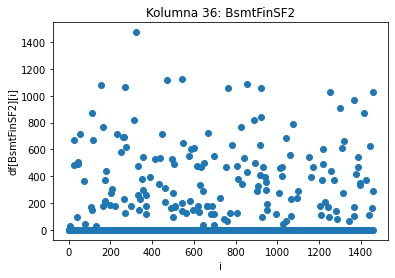



Informacje o kolumnie 37: BsmtUnfSF
Czy są NaNy: False
Unikatowe wartości:
[ 150  284  434  540  490   64  317  216  952  140  134  177  175 1494
  520  832  426    0  468  525 1158  637 1777  200  204 1566  180  486
  207  649 1228 1234  380  408 1117 1097   84  326  445  383  167  465
 1296   83 1632  736  192  612  816   32  935  321  860 1410  148  217
  530 1346  576  318 1143 1035  440  747  701  343  280  404  840  724
  295 1768  448   36 1530 1065  384 1288  684 1013  402  635  163  168
  176  370  350  381  410  741 1226 1053  641  516  793 1139  550  905
  104  310  252 1125  203  728  732  510  899 1362   30  958  556  413
  479  297  658  262  891 1304  519 1907  336  107  432  403  811  396
  970  506  884  400  896  253  409   93 1200  572  774  769 1335  340
  882  779  112  470  294 1686  360  441  354  700  725  320  554  312
  968  504 1107  577  660   99  871  474  289  600  755  625 1121  276
  186 1424 1140  375   92  305 1176   78  274  311  710  686  457 1232


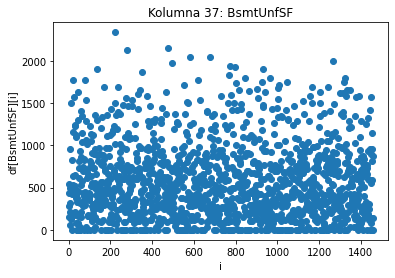



Informacje o kolumnie 38: TotalBsmtSF
Czy są NaNy: False
Unikatowe wartości:
[ 856 1262  920  756 1145  796 1686 1107  952  991 1040 1175  912 1494
 1253  832 1004    0 1114 1029 1158  637 1777 1060 1566  900 1704 1484
  520  649 1228 1234 1398 1561 1117 1097 1297 1057 1088 1350  840  938
 1150 1752 1434 1656  736  955  794  816 1842  384 1425  970  860 1410
  780  530 1370  576 1143 1947 1453  747 1304 2223  845 1086  462  672
 1768  440  896 1237 1563 1065 1288  684  612 1013  990 1235  876 1214
  824  680 1588  960  458  950 1610  741 1226 1053  641  789  793 1844
  994 1264 1809 1028  729 1092 1125 1673  728  732 1080 1199 1362 1078
  660 1008  924  992 1063 1267 1461 1907  928  864 1734  910 1490 1728
  715  884  969 1710  825 1602 1200  572  774 1392 1232 1572 1541  882
 1149  644 1617 1582  720 1064 1606 1202 1151 1052 2216  968  504 1188
 1593  853  725 1431  855 1726 1360  755 1713 1121 1196  617  848 1424
 1140 1100 1157 1212  689 1070 1436  686  798 1248 1498 1010  713 239

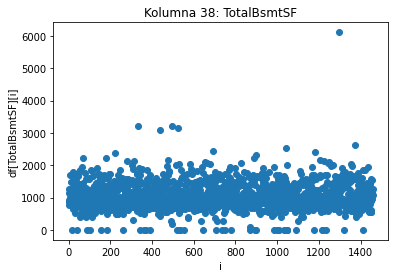



Informacje o kolumnie 39: Heating
Czy są NaNy: False
Unikatowe wartości:
['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']


Informacje o kolumnie 40: HeatingQC
Czy są NaNy: False
Unikatowe wartości:
['Ex' 'Gd' 'TA' 'Fa' 'Po']




In [41]:
# kolumny 21-40

col_names_21_40 = df.columns[20:40] 

# lista boolean odpowiadajaca na pytanie czy tworzyc wykres scatter do danej kolumny (czyli czy jest ona ciagla)
paint = {col: 0 for col in df.columns[20:40]}
# recznie wpisuje ktore rysowac bo nie umiem inaczej xd
paint['MasVnrArea'] = 1
paint['BsmtFinSF1'] = 1
paint['BsmtFinSF2'] = 1
paint['BsmtUnfSF'] = 1
paint['TotalBsmtSF'] = 1

# wypisanie informacji o NaNach, unikatowych wartości oraz wykresow 
i = 21
for col in col_names_21_40:
  print(f'Informacje o kolumnie {i}: {col}')
  print(f'Czy są NaNy: {df[col].isnull().values.any()}')
  print(f'Unikatowe wartości:')
  print(df[col].unique())
  if paint[col]:
    plt.scatter(range(0,len(df[col])), df[col].fillna(df[col].mode()))
    plt.xlabel('i')
    plt.ylabel(f'df[{col}][i]')
    plt.title(f'Kolumna {i}: {col}')
    plt.show()
  print('')
  print('')
  i += 1

In [42]:
# ostatnie 61-80 kolumn, sprawdzannie outlierów
print('GarageCars')
print(df['GarageCars'].unique()) # brak
print('GarageQual')
print(df['GarageQual'].unique()) # brak
print('GarageCond')
print(df['GarageCond'].unique()) # brak
print('PavedDrive')
print(df['PavedDrive'].unique()) # brak
print('WoodDeckSF')
print(df['WoodDeckSF'].unique()) # potencjonalnie są
print('OpenPorchSF')
print(df['OpenPorchSF'].unique()) # potencjonalnie są
print('EnclosedPorch')
print(df['EnclosedPorch'].unique()) # potencjonalnie są 
print('3SsnPorch')
print(df['3SsnPorch'].unique()) # potencjonalnie są
print('ScreenPorch')
print(df['ScreenPorch'].unique()) # potencjonalnie są
print('PoolArea')
print(df['PoolArea'].unique()) # brak
print('PoolQC')
print(df['PoolQC'].unique()) # brak
print('Fence')
print(df['Fence'].unique()) # brak
print('MiscFeature')
print(df['MiscFeature'].unique()) # brak
print('MiscVal')
print(df['MiscVal'].unique()) # brak
print('GaraMoSoldgeCars')
print(df['MoSold'].unique()) # brak
print('YrSold')
print(df['YrSold'].unique()) # brak
print('SaleType')
print(df['SaleType'].unique()) # brak
print('SaleCondition')
print(df['SaleCondition'].unique()) # brak

GarageCars
[2 3 1 0 4]
GarageQual
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
PavedDrive
['Y' 'N' 'P']
WoodDeckSF
[  0 298 192  40 255 235  90 147 140 160  48 240 171 100 406 222 288  49
 203 113 392 145 196 168 112 106 857 115 120  12 576 301 144 300  74 127
 232 158 352 182 180 166 224  80 367  53 188 105  24  98 276 200 409 239
 400 476 178 574 237 210 441 116 280 104  87 132 238 149 355  60 139 108
 351 209 216 248 143 365 370  58 197 263 123 138 333 250 292  95 262  81
 289 124 172 110 208 468 256 302 190 340 233 184 201 142 122 155 670 135
 495 536 306  64 364 353  66 159 146 296 125  44 215 264  88  89  96 414
 519 206 141 260 324 156 220  38 261 126  85 466 270  78 169 320 268  72
 349  42  35 326 382 161 179 103 253 148 335 176 390 328 312 185 269 195
  57 236 517 304 198 426  28 316 322 307 257 219 416 344 380  68 114 327
 165 187 181  92 228 245 503 315 241 303 133 403  36  52 265 207 150 290
 486 278  70 418 234  26 342  97 272 121 243 511 154 1

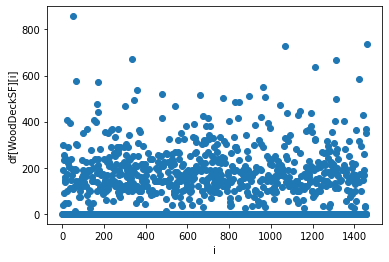

In [43]:
plt.scatter(range(0,len(df['WoodDeckSF'])), df['WoodDeckSF'])
plt.xlabel('i')
plt.ylabel('df[WoodDeckSF][i]')
# Outliering
df = df[((df['WoodDeckSF'] - df['WoodDeckSF'].mean()) / df['WoodDeckSF'].std()).abs() < 5]

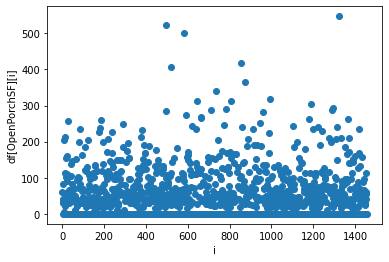

In [ ]:
plt.scatter(range(0,len(df['OpenPorchSF'])), df['OpenPorchSF'])
plt.xlabel('i')
plt.ylabel('df[OpenPorchSF][i]')
# Outliering
df = df[((df['OpenPorchSF'] - df['OpenPorchSF'].mean()) / df['OpenPorchSF'].std()).abs() < 5]

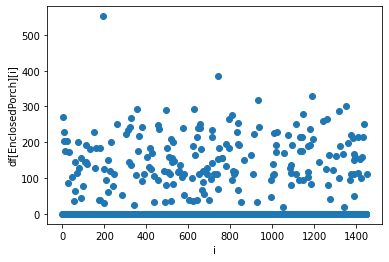

In [ ]:
plt.scatter(range(0,len(df['EnclosedPorch'])), df['EnclosedPorch'])
plt.xlabel('i')
plt.ylabel('df[EnclosedPorch][i]')
# Outliering
df = df[((df['EnclosedPorch'] - df['EnclosedPorch'].mean()) / df['EnclosedPorch'].std()).abs() < 5]

Text(0, 0.5, 'df[3SsnPorch][i]')

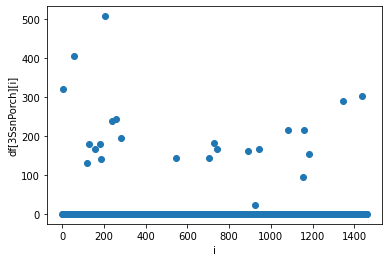

In [ ]:
plt.scatter(range(0,len(df['3SsnPorch'])), df['3SsnPorch'])
plt.xlabel('i')
plt.ylabel('df[3SsnPorch][i]')

8


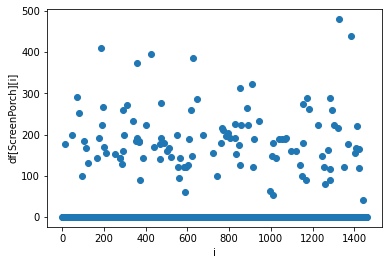

In [ ]:
plt.scatter(range(0,len(df['ScreenPorch'])), df['ScreenPorch'])
plt.xlabel('i')
plt.ylabel('df[ScreenPorch][i]')

In [ ]:
# OUTLIERY - kolumny 20-40



In [ ]:
#sprawdzanie czy sa outliery (przejrzec kazda kolumne)

#kolumny 40-60
print(df['CentralAir'].unique())   #brak
print(df['Electrical'].unique())   #brak
print(df['1stFlrSF'].unique())     #zrobic wykres
print(df['2ndFlrSF'].unique())     #zrobic wykres
print(df['LowQualFinSF'].unique()) #brak
print(df['GrLivArea'].unique())    #zrobic wykres
print(df['BsmtFullBath'].unique()) #brak
print(df['BsmtHalfBath'].unique()) #brak
print(df['FullBath'].unique())     #brak
print(df['HalfBath'].unique())     #brak
print(df['BedroomAbvGr'].unique()) #brak
print(df['KitchenAbvGr'].unique()) #brak
print(df['KitchenQual'].unique())  #brak
print(df['TotRmsAbvGrd'].unique()) #brak
print(df['Functional'].unique())   #brak
print(df['Fireplaces'].unique())   #brak
print(df['FireplaceQu'].unique())  #brak
print(df['GarageType'].unique())   #brak
print(df['GarageYrBlt'].unique())  #zrobic wykres
print(df['GarageFinish'].unique()) #brak

IndexError: ignored

Text(0, 0.5, 'df[1stFlrSF][i]')

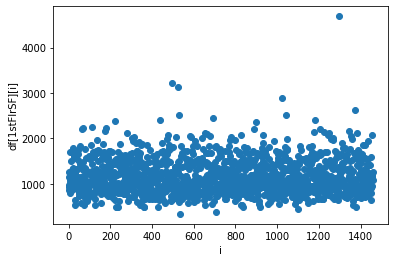

In [ ]:
# '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt'

plt.scatter(range(0,len(df['1stFlrSF'])), df['1stFlrSF'])
plt.xlabel('i')
plt.ylabel('df[1stFlrSF][i]')

Text(0, 0.5, 'df[2ndFlrSF][i]')

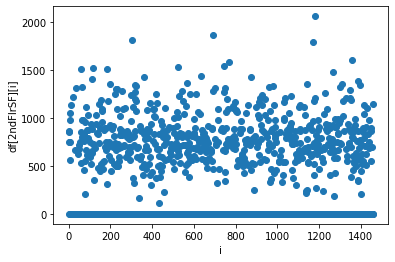

In [ ]:
plt.scatter(range(0,len(df['2ndFlrSF'])), df['2ndFlrSF'])
plt.xlabel('i')
plt.ylabel('df[2ndFlrSF][i]')

Text(0, 0.5, 'df[GrLivArea][i]')

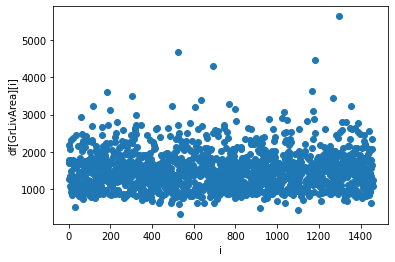

In [ ]:
plt.scatter(range(0,len(df['GrLivArea'])), df['GrLivArea'])
plt.xlabel('i')
plt.ylabel('df[GrLivArea][i]')

Text(0, 0.5, 'df[GarageYrBlt][i]')

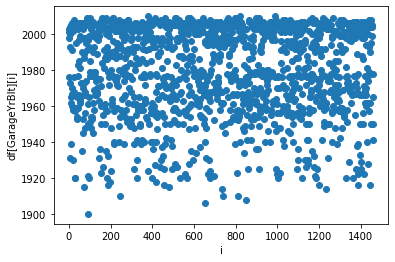

In [ ]:
plt.scatter(range(0,len(df['GarageYrBlt'])), df['GarageYrBlt'])
plt.xlabel('i')
plt.ylabel('df[GarageYrBlt][i]')

Text(0, 0.5, 'df[YearBuilt][i]')

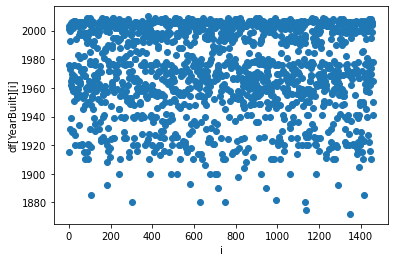

In [ ]:
plt.scatter(range(0,len(df['YearBuilt'])), df['YearBuilt'])
plt.xlabel('i')
plt.ylabel('df[YearBuilt][i]')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


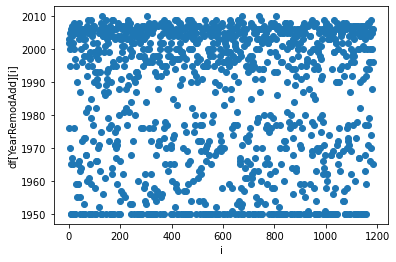

In [ ]:
plt.scatter(range(0,len(df['YearRemodAdd'])), df['YearRemodAdd'])
plt.xlabel('i')
plt.ylabel('df[YearRemodAdd][i]')
df

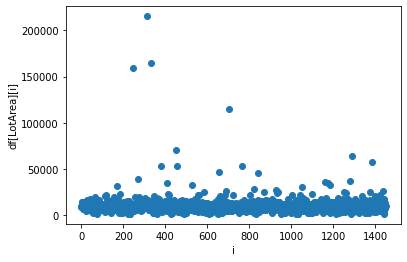

In [ ]:
plt.scatter(range(0,len(df['LotArea'])), df['LotArea'])
plt.xlabel('i')
plt.ylabel('df[LotArea][i]')
# Outliering
df = df[((df['LotArea'] - df['LotArea'].mean()) / df['LotArea'].std()).abs() < 5]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


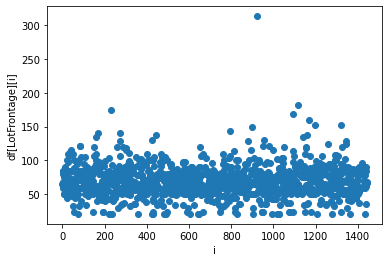

In [ ]:
plt.scatter(range(0,len(df['LotFrontage'])), df['LotFrontage'])
plt.xlabel('i')
plt.ylabel('df[LotFrontage][i]')
# Outliering
df = df[((df['LotFrontage'] - df['LotFrontage'].mean()) / df['LotFrontage'].std()).abs() < 4]
df

# Data Preparation

In [33]:
def preprocess(dataframe):
    # MSSubClass: Identifies the type of dwelling involved in the sale. - kategorie
    dataframe['MSSubClass'] = LabelEncoder().fit_transform(dataframe['MSSubClass'].astype('str'))

    # MSZoning: Identifies the general zoning classification of the sale. - kategorie
    dataframe['MSZoning'] = LabelEncoder().fit_transform(dataframe['MSZoning'].astype('str'))

    # LotFrontage: Linear feet of street connected to property - zmienna liczbowa, skalujemy według rozkładu normalnego
    # NA oznacza 0
    dataframe['LotFrontage'] = dataframe['LotFrontage'].replace({np.nan: 0})
    dataframe['LotFrontage'] = StandardScaler().fit_transform(np.array(dataframe['LotFrontage']).reshape(-1, 1));

    # LotArea: Lot size in square feet - zmienna liczbowa, skalujemy według rozkładu normalnego
    dataframe['LotArea'] = StandardScaler().fit_transform(dataframe['LotArea'].values.reshape(-1, 1))

    # Street: Type of road access to property - kategoria
    dataframe['Street'] = LabelEncoder().fit_transform(dataframe['Street'].astype('str'))

    # Alley: Type of alley access to property - kategoria
    dataframe['Alley'] = LabelEncoder().fit_transform(dataframe['Alley'].astype('str'))

    # LotShape: General shape of property - kategoria, zmienna jakościowa
    lotShapeDict = {"Reg": 1, "IR1": 2, "IR2": 3, "IR3": 4}
    dataframe['LotShape'] = dataframe['LotShape'].replace(lotShapeDict)

    # LandContour: Flatness of the property - kategoria
    dataframe['LandContour'] = LabelEncoder().fit_transform(dataframe['LandContour'].astype('str'))

    # LotConfig: Lot configuration - kategoria
    dataframe['LotConfig'] = LabelEncoder().fit_transform(dataframe['LotConfig'].astype('str'))

    # LandSlope: Slope of property - kategoria
    dataframe['LandSlope'] = LabelEncoder().fit_transform(dataframe['LandContour'].astype('str'))

    # Neighborhood: Physical locations within Ames city limits - kategoria
    dataframe['Neighborhood'] = LabelEncoder().fit_transform(dataframe['Neighborhood'].astype('str'))

    # Condition1: Proximity to various conditions
    # Condition2: Proximity to various conditions (if more than one is present) - kategorie
    conditionDict = {"Artery": 1, "Feedr": 2, "Norm": 3,	"RRNn": 4, "RRAn": 5, "PosN": 6, "PosA": 7, "RRNe": 8, "RRAe": 9}
    dataframe['Condition1'] = dataframe['Condition1'].replace(conditionDict)
    dataframe['Condition2'] = dataframe['Condition2'].replace(conditionDict)

    # Utilities: Type of utilities available - kategoria, zmienna jakościowa - każda kolejna kategoria oznacza wyższy standard
    utilitiesDict = {"AllPub": 3, "NoSewr": 2, "NoSeWa": 1, "ELO": 0}
    dataframe['Utilities'] = dataframe['Utilities'].replace(utilitiesDict);

    # BldgType: Type of dwelling - kategoria
    dataframe['BldgType'] = LabelEncoder().fit_transform(dataframe['BldgType'].astype('str'))

    # HouseStyle: Style of dwelling - kategoria
    dataframe['HouseStyle'] = LabelEncoder().fit_transform(dataframe['HouseStyle'].astype('str'))

    # YearBuilt, YearRemodAdd, OverallCond, OverallQual: Zmienne liczbowe - uznaliśmy, że nie ma potrzeby ich przekształcać
    # zmienna dyskretna bez brakujących wartości, nia ma potrzeby przekształceń
    print(dataframe['GarageCars'].isna().sum())
    # zmienna ciągła, skalujemy wg rozkładu normalnego
    print(dataframe['GarageArea'].isna().sum())
    dataframe['GarageArea'] = StandardScaler().fit_transform(dataframe['GarageArea'].values.reshape(-1,1))
    # zmienna kategoryczna, zamiana kategorii na liczby, nan oznacza brak garażu
    print(dataframe['GarageQual'].isna().sum())
    unq_vals = dataframe['GarageQual'].unique().astype('str')
    dataframe['GarageQual'] = dataframe['GarageQual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0})
    # zmienna kategoryczna, zamiana kategorii na liczby, nan oznacza brak garażu
    print(dataframe['GarageCond'].isna().sum())
    print(dataframe['GarageCond'].unique())
    dataframe['GarageCond'] = dataframe['GarageCond'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0})
    # zmienna kategoryczna, zamiana kategorii na liczby
    print(dataframe['PavedDrive'].isna().sum())
    dataframe['PavedDrive'] = LabelEncoder().fit_transform(dataframe['PavedDrive'])
    # zmienna ciągła, skalujemy wg rozkładu normalnego
    print(dataframe['WoodDeckSF'].isna().sum())
    dataframe['WoodDeckSF'] = StandardScaler().fit_transform(dataframe['WoodDeckSF'].values.reshape(-1,1))
    # zmienna ciągła, skalujemy wg rozkładu normalnego
    print(dataframe['OpenPorchSF'].isna().sum())
    dataframe['OpenPorchSF'] = StandardScaler().fit_transform(dataframe['OpenPorchSF'].values.reshape(-1,1))
    # zmienna ciągła, skalujemy wg rozkładu normalnego
    print(dataframe['EnclosedPorch'].isna().sum())
    dataframe['EnclosedPorch'] = StandardScaler().fit_transform(dataframe['EnclosedPorch'].values.reshape(-1,1))
    # zmienna ciągła, skalujemy wg rozkładu normalnego
    print(dataframe['3SsnPorch'].isna().sum())
    dataframe['3SsnPorch'] = StandardScaler().fit_transform(dataframe['3SsnPorch'].values.reshape(-1,1))
    # zmienna ciągła, skalujemy wg rozkładu normalnego
    print(dataframe['ScreenPorch'].isna().sum())
    dataframe['ScreenPorch'] = StandardScaler().fit_transform(dataframe['ScreenPorch'].values.reshape(-1,1))
    # zmienna ciągła, skalujemy wg rozkładu normalnego
    print(dataframe['PoolArea'].isna().sum())
    dataframe['PoolArea'] = StandardScaler().fit_transform(dataframe['PoolArea'].values.reshape(-1,1))
    # zmienna kategoryczna, zamiana kategorii na liczby, nan oznacza brak basenu
    print(dataframe['PoolQC'].isna().sum())
    print(dataframe['PoolQC'].unique())
    dataframe['PoolQC'] = dataframe['PoolQC'].replace({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, np.nan: 0})
    # zmienna kategoryczna, zamiana kategorii na liczby, nan oznacza brak ogrodzenia
    print(dataframe['Fence'].isna().sum())
    print(dataframe['Fence'].unique())
    dataframe['Fence'] = dataframe['Fence'].replace({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, np.nan: 0})
    # zmienna kategoryczna, zamiana kategorii na liczby, nan oznacza brak któregokolwiek z wymienionych udogodnień
    print(dataframe['MiscFeature'].isna().sum())
    print(dataframe['MiscFeature'].unique())
    dataframe['MiscFeature'] = dataframe['MiscFeature'].replace({'Elev': 5, 'Gar2': 4, 'Othr': 3, 'Shed': 2, 'TenC': 1, np.nan: 0})
    # zmienna ciągła, skalujemy wg rozkładu normalnego
    print(dataframe['MiscVal'].isna().sum())
    dataframe['MiscVal'] = StandardScaler().fit_transform(dataframe['MiscVal'].values.reshape(-1,1))
    # zmienna typu data
    print(dataframe['MoSold'].isna().sum())
    # zmienna typu data
    print(dataframe['YrSold'].isna().sum())
    # zmienna kategoryczna, zamiana kategorii na liczby,
    print(dataframe['SaleType'].isna().sum())
    dataframe['SaleType'] = LabelEncoder().fit_transform(dataframe['SaleType'])
    # zmienna kategoryczna, zamiana kategorii na liczby,
    print(dataframe['SaleCondition'].isna().sum())
    dataframe['SaleCondition'] = LabelEncoder().fit_transform(dataframe['SaleCondition'])
    # objaśniana zmienna, bierzemy logarytm żeby z równą wagą traktować duże i małe wartości 
    print(dataframe['SalePrice'].isna().sum())
    dataframe['SalePrice'] = np.log(dataframe['SalePrice'])

    # kolumny 21 - 40

    # na kolumnach bede kolejno robil:
    # 1) zamiana wartosci nan (jesli trzeba)
    # 2) zamiane wartosci dyskretnych na liczby calkowite (jesli trzeba)
    # 3) zamiana / pozbycie sie outlierow (jesli trzeba)
    # 4) skalowanie zmiennych ciaglych

    dataframe20_40 = dataframe.iloc[:,20:40]  # będę pracował na kopii, potem ją wrzucę do głównego dataframe
    
    # 21 kolumna - RoofStyle

    col = dataframe20_40['RoofStyle']
    np_col = np.array(col)
    # zamiana string na int, zaczynajac od 0 i idąc alfabetycznie
    new_names = {'Flat': 0,
                'Gable': 1,
                'Gambrel': 2,
                'Hip': 3,
                'Mansard': 4,
                'Shed': 5}
    col_num = col.replace(new_names)

    dataframe20_40['RoofStyle'] = col_num

    
    # 22 kolumna - RoofMatl

    col = dataframe20_40['RoofMatl']
    np_col = np.array(col)
    # zamiana string na int, zaczynajac od 0 i idąc alfabetycznie
    new_names = {'ClyTile': 0,
                'CompShg': 1,
                'Membran': 2,
                'Metal': 3,
                'Roll': 4,
                'Tar&Grv': 5,
                'WdShake': 6,
                'WdShngl': 7}
    col_num = col.replace(new_names)

    dataframe20_40['RoofMatl'] = col_num

    
    # 23 kolumna - Exterior1st

    col = dataframe20_40['Exterior1st']
    np_col = np.array(col)
    # zamiana string na int, robię to LabelEncoderem ponieważ nie jest to zmienna jakościowa (cech nie da się uporządkować)
    col_num = LabelEncoder().fit_transform(col.astype('str'))

    dataframe20_40['Exterior1st'] = col_num


    # 24 kolumna - Exterior2nd

    col = dataframe20_40['Exterior2nd']
    np_col = np.array(col)
    # zamiana string na int, robię to LabelEncoderem ponieważ nie jest to zmienna jakościowa (cech nie da się uporządkować)
    col_num = LabelEncoder().fit_transform(col.astype('str'))

    dataframe20_40['Exterior2nd'] = col_num


    # 25 kolumna - MasVnrType: Masonry veneer type

    col = dataframe20_40['MasVnrType']
    # zamiana nan na -1
    if col.isnull().values.any():
        col = col.fillna('-1')

    np_col = np.array(col)
    # zamiana string na int, cech nie da się uporządkować ale robię Series.replace() ze względu na to, że chcę aby NaNy miały wartość -1
    col_names = {'-1': -1,
                'BrkCmn': 0,
                'BrkFace': 1,
                'CBlock': 2,
                'None': 3,
                'Stone': 4}
    col_num = col.replace(col_names)

    dataframe20_40['MasVnrType'] = col_num


    # 26 kolumna - MasVnrArea: Masonry veneer area in square feet

    col = dataframe20_40['MasVnrArea']
    if col.isnull().values.any():
        col = col.fillna(col.mean())
    # kolumna posiada ciągłe wartości liczbowe, więc przeskalowuje funkcją StandardScaler() z domyślnymi parametrami (przesunięcie o średnią próbki i podzielenie przez odchylenie standardowe)
    np_col = col.values
    np_col = StandardScaler().fit_transform(np_col.reshape([-1,1]))
    np_col = np_col.reshape(-1)
    # usuwanie outlierow:
    mean = np_col.mean()
    std = np_col.std()
    mode = stats.mode(np_col)[0]
    lbound = mean - (4 * std)
    hbound = mean + (4 * std)
    np_col[np.logical_or(np_col < lbound, np_col > hbound)] = mode

    dataframe20_40['MasVnrArea'] = np_col


    # 27 kolumna - ExterQual

    col = dataframe20_40['ExterQual']
    # zmienna jakościowa, zamiana string na int w ten sposób, że wieksza liczba == lepiej
    new_names = {'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3,
                'Ex': 4}

    col_num = col.replace(new_names)

    dataframe20_40['ExterQual'] = col_num
    # 28 kolumna - ExterCond

    col = dataframe20_40['ExterCond']
    # zmienna jakościowa, zamiana string na int w ten sposób, że wieksza liczba == lepiej
    new_names = {'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3,
                'Ex': 4}
    col_num = col.replace(new_names)

    dataframe20_40['ExterCond'] = col_num


    # 29 kolumna - Foundation

    col = dataframe20_40['Foundation']
    # zamiana string na int, robię to LabelEncoderem ponieważ nie jest to zmienna jakościowa (cech nie da się uporządkować)
    col_num = LabelEncoder().fit_transform(col.astype('str'))

    dataframe20_40['Foundation'] = col_num


    # 30 kolumna - BsmtQual: Evaluates the height of the basement
    # zakladam ze null to brak piwnicy

    col = dataframe20_40['BsmtQual']
    col = col.fillna('NA')
    # zmienna jakościowa, zamiana string na int w ten sposób, że wieksza liczba == lepiej
    new_names = {'NA': 0,
                'Po': 1,
                'Fa': 2,
                'TA': 3,
                'Gd': 4,
                'Ex': 5}
    col_num = col.replace(new_names)

    dataframe20_40['BsmtQual'] = col_num


    # 31 kolumna - BsmtCond: Evaluates the general condition of the basement
    # zakladam ze null to brak piwnicy

    col = dataframe20_40['BsmtCond']
    col = col.fillna('NA')
    # zmienna jakościowa, zamiana string na int w ten sposób, że wieksza liczba == lepiej
    new_names = {'NA': 0,
                'Po': 1,
                'Fa': 2,
                'TA': 3,
                'Gd': 4,
                'Ex': 5}
    col_num = col.replace(new_names)

    dataframe20_40['BsmtCond'] = col_num


    # 32 kolumna - BsmtExposure: Refers to walkout or garden level walls
    # zakladam ze null to brak piwnicy

    col = dataframe20_40['BsmtExposure']
    col = col.fillna('NA')
    # zmienna jakościowa, zamiana string na int w ten sposób, że wieksza liczba == lepiej
    new_names = {'NA': 0,
                'No': 1,
                'Mn': 2,
                'Av': 3,
                'Gd': 4}
    col_num = col.replace(new_names)

    dataframe20_40['BsmtExposure'] = col_num


    # 33 kolumna - BsmtFinType1: Rating of basement finished area

    col = dataframe20_40['BsmtFinType1']
    col = col.fillna('NA')
    # zmienna jakościowa, zamiana string na int w ten sposób, że wieksza liczba == lepiej
    new_names = {'NA': 0,
                'Unf': 1,
                'LwQ': 2,
                'Rec': 3,
                'BLQ': 4,
                'ALQ': 5,
                'GLQ': 6}
    col_num = col.replace(new_names)

    dataframe20_40['BsmtFinType1'] = col_num


    # 34 kolumna - BsmtFinSF1: Type 1 finished square feet

    col = dataframe20_40['BsmtFinSF1']
    # kolumna posiada ciągłe wartości liczbowe, więc przeskalowuje funkcją StandardScaler() z domyślnymi parametrami (przesunięcie o średnią próbki i podzielenie przez odchylenie standardowe)
    np_col = col.values
    np_col = StandardScaler().fit_transform(np_col.reshape([-1,1]))
    np_col = np_col.reshape(-1)
    # usuwanie outlierow:
    mean = np_col.mean()
    std = np_col.std()
    mode = stats.mode(np_col)[0]
    lbound = mean - (4 * std)
    hbound = mean + (4 * std)
    np_col[np.logical_or(np_col < lbound, np_col > hbound)] = mode

    dataframe20_40['BsmtFinSF1'] = np_col


    # 35 kolumna - BsmtFinType2: Rating of basement finished area (if multiple types)

    col = dataframe20_40['BsmtFinType2']
    col = col.fillna('NA')

    # zmienna jakościowa, zamiana string na int w ten sposób, że wieksza liczba == lepiej
    new_names = {'NA': 0,
                'Unf': 1,
                'LwQ': 2,
                'Rec': 3,
                'BLQ': 4,
                'ALQ': 5,
                'GLQ': 6}
    col_num = col.replace(new_names)

    dataframe20_40['BsmtFinType2'] = col_num


    # 36 kolumna - BsmtFinSF2: Type 2 finished square feet

    col = dataframe20_40['BsmtFinSF2']
    # kolumna posiada ciągłe wartości liczbowe, więc przeskalowuje funkcją StandardScaler() z domyślnymi parametrami (przesunięcie o średnią próbki i podzielenie przez odchylenie standardowe)
    np_col = col.values
    np_col = StandardScaler().fit_transform(np_col.reshape([-1,1]))
    np_col = np_col.reshape(-1)
    # usuwanie outlierow:
    mean = np_col.mean()
    std = np_col.std()
    mode = stats.mode(np_col)[0]
    lbound = mean - (4 * std)
    hbound = mean + (4 * std)
    np_col[np.logical_or(np_col < lbound, np_col > hbound)] = mode

    dataframe20_40['BsmtFinSF2'] = np_col


    # 37 kolumna - BsmtUnfSF: Unfinished square feet of basement area
    col = dataframe20_40['BsmtUnfSF']
    # kolumna posiada ciągłe wartości liczbowe, więc przeskalowuje funkcją StandardScaler() z domyślnymi parametrami (przesunięcie o średnią próbki i podzielenie przez odchylenie standardowe)
    np_col = col.values
    np_col = StandardScaler().fit_transform(np_col.reshape([-1,1]))
    # nie ma potrzeby na usuwanie outlierow

    dataframe20_40['BsmtUnfSF'] = np_col


    # 38 kolumna - TotalBsmtSF: Total square feet of basement area

    col = dataframe20_40['TotalBsmtSF']
    # kolumna posiada ciągłe wartości liczbowe, więc przeskalowuje funkcją StandardScaler() z domyślnymi parametrami (przesunięcie o średnią próbki i podzielenie przez odchylenie standardowe)
    np_col = col.values
    np_col = StandardScaler().fit_transform(np_col.reshape([-1,1]))
    np_col = np_col.reshape(-1)
    # usuwanie outlierow:
    mean = np_col.mean()
    std = np_col.std()
    mode = stats.mode(np_col)[0]
    lbound = mean - (4 * std)
    hbound = mean + (4 * std)
    np_col[np.logical_or(np_col < lbound, np_col > hbound)] = mode

    dataframe20_40['TotalBsmtSF'] = np_col


    # 39 kolumna - Heating: Type of heating

    col = dataframe20_40['Heating']
    # zmienna jakościowa, zamiana string na int w ten sposób, że wieksza liczba == lepiej
    new_names = {'Wall': 0,
                'Floor': 1,
                'GasA': 2,
                'GasW': 3,
                'Grav': 4,
                'OthW': 5,
                'Wall': 6}
    col_num = col.replace(new_names)

    dataframe20_40['Heating'] = col_num


    # 40 kolumna - HeatingQC: Heating quality and condition

    col = dataframe20_40['HeatingQC']

    # zmienna jakościowa, zamiana string na int w ten sposób, że wieksza liczba == lepiej
    new_names = {'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3,
                'Ex': 4}
    col_num = col.replace(new_names)

    dataframe20_40['HeatingQC'] = col_num
    dataframe.iloc[:,20:40] = dataframe20_40


    # kolumny 41-60
    dataframe2 = dataframe.iloc[:,40:59]

    # BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces - kolumny, z którymi nic nie robiłam, bo mają po kilka dyskretnych wartosci, wiec beda dzialac :)
    #GarageYrBlt - lata (1900 - 2010), trzeba się zastanowić jeszcze, co zrobić z tą kolumną 
    dataframe2["GarageYrBlt"] = dataframe2["GarageYrBlt"].fillna(np.mean(dataframe2["GarageYrBlt"]))

    #CentralAir - zmienna kategoryczna, dwie wartości Yes, No przerabiamy na 0,1
    dataframe2['CentralAir'] = LabelEncoder().fit_transform(dataframe['CentralAir'].astype('str'))

    #Electrical - zmienna kategoryczna (5 kategorii) -> zmienna dyskretna (0-4)
    dataframe2['Electrical'] = LabelEncoder().fit_transform(dataframe['Electrical'].astype('str'))

    #1stFlrSF - powierzchnia pierwszego pietra -> standaryzacja
    c3 = dataframe["1stFlrSF"].values 
    dataframe2["1stFlrSF"] = StandardScaler().fit_transform(c3.reshape(-1,1)) 

    #2ndflrSF - powierzchnia drugiego pietra -> standaryzacja
    c4 = dataframe["2ndFlrSF"].values     
    dataframe2["2ndFlrSF"] = StandardScaler().fit_transform(c4.reshape(-1,1)) 

    #LowQualFinSF - powierzchnia zlej jakosci -> standaryzacja
    c5 = dataframe["LowQualFinSF"].values      
    dataframe2["LowQualFinSF"] = StandardScaler().fit_transform(c5.reshape(-1,1)) 

    #GrLivAre - powierzchnia jakosci ponad norme -> standaryzacja
    c6 = dataframe["GrLivArea"].values   
    dataframe2["GrLivArea"] = StandardScaler().fit_transform(c6.reshape(-1,1)) 

    #KitchenQual - zmienna kategoryczna (5 kategorii) -> zmienna dyskretna (0-4)
    c11 = dataframe["KitchenQual"]
    new_names = {
        'Po' : 0,
        'Fa' : 1,
        'TA' : 2,
        'Gd' : 3,
        'Ex' : 4
    }
    dataframe2["KitchenQual"] = c11.replace(new_names)

    #Functional - zmienna jakościowa (8 kategorii w porządku od najgorszego (0) do najlepszego (7)) -> zmienna dyskretna (0-7)
    c13 = dataframe["Functional"]
    new_names1 = {
        'Sal' : 0,
        'Sev' : 1,
        'Maj2' : 2,
        'Maj1' : 3,
        'Mod' : 4,
        'Min2' : 5,
        'Min1' : 6,
        'Typ' : 7
    }
    dataframe2["Functional"] = c13.replace(new_names1)

    #FireplaceQu - NA - z opisu danych oznacza brak kominka, nadajemy temu kategorię 0
    #            - zmienna jakościowa (6 kategorii od najgorszej, czyli braku kominka(0) do najlepszej (5)) -> zmienna dyskretna (0-5)
    c15 = dataframe["FireplaceQu"]
    c15 = c15.fillna(0)
    new_names2 = {
        np.nan : 0,
        'Po' : 1,
        'Fa' : 2,
        'TA' : 3,
        'Gd' : 4,
        'Ex' : 5
    }
    dataframe2["FireplaceQu"] = c15.replace(new_names2)

    #GarageType - z opisu danych brak oznacza brak garażu -> nadajemy kategorię 0
    #           - zmienna kategoryczna  (7 kategorii) -> zmienna dyskretna (0-6)
    c16 = dataframe["GarageType"]
    new_names3 = {
        np.nan : 0,
        'nan': 0,
        'NA': 0,
        None: 0,
        '': 0,
        float('nan'): 0,
        'Detchd' : 1,
        'CarPort' : 2,
        'BuiltIn' : 3,
        'Basment' : 4,
        'Attchd' : 5,
        '2Types' : 6
    }
    dataframe2["GarageType"] = c16.replace(new_names3)

    #GarageFinish - z opisu danych NA oznacza brak garaż€ -> nadajemy kategorię 0
    #             - zmienna jakościowa (4 kategorie, od najgorszej (0), do najlepszej (3)) -> zmienna dyskretna (0-3)
    c18 = dataframe["GarageFinish"]
    new_names4 = {
        np.nan : 0,
        'Unf' : 1,
        'RFn' : 2,
        'Fin' : 3
    }
    dataframe2["GarageFinish"] = c18.replace(new_names4)


    dataframe.iloc[:, 40:60] = dataframe2

    return dataframe

In [34]:
df = preprocess(df)
df = df.values

X, y = df[:,:-1], df[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

0
0
81
81
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
0
0
0
0
0
0
0
1453
[nan 'Ex' 'Fa' 'Gd']
1179
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
1406
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
0
0
0
0
0
0


# Modeling

In [ ]:
# test_df = pd.read_csv("/content/WTUM_11_2022/test.csv", header=0)
# print(test_df)
# test_df = df.iloc[:,1:]
# test_df = preprocess(test_df)
# test_df = test_df.values
# X_test = test_df[:,:-1]
# y_test = test_df[:,-1]

In [ ]:
param_grid = {'n_estimators': [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}
random_forest1_clf = GridSearchCV(RandomForestRegressor(), param_grid, n_jobs=-1)
random_forest1_clf.fit(X_train, y_train)

In [ ]:
print(random_forest1_clf.best_params_)
print(random_forest1_clf.score(X_test, y_test))

{'n_estimators': 1000}
0.854239784196487


In [ ]:
param_grid = {'min_samples_split': range(2,20,1)}
random_forest2_clf = GridSearchCV(RandomForestRegressor(n_estimators = 1000), param_grid, n_jobs=-1)
random_forest2_clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(n_estimators=1000), n_jobs=-1,
             param_grid={'min_samples_split': range(2, 20)})

In [ ]:
print(random_forest2_clf.best_params_)
print(random_forest2_clf.score(X_test, y_test))

{'min_samples_split': 2}
0.8546500039877596


In [ ]:
param_grid = {'n_estimators': range(10,170,40), 'min_samples_split': range(2,10,2)}
random_forest_clf = GridSearchCV(RandomForestRegressor(), param_grid, n_jobs=-1)
random_forest_clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 170, 40)})

In [ ]:
print(random_forest_clf.best_params_)
print(random_forest_clf.score(X_test, y_test))

{'min_samples_split': 6, 'n_estimators': 130}
0.882711307933166


In [ ]:
param_grid = {'n_estimators': [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'base_estimator': [None, LinearRegression(), BayesianRidge(), ARDRegression(), Ridge()]}
ada_boost_clf = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1)
ada_boost_clf.fit(X_train, y_train)

print(ada_boost_clf.best_params_)
print(ada_boost_clf.score(X_test, y_test))

{'base_estimator': BayesianRidge(), 'n_estimators': 700}
0.893396000562253


In [ ]:
param_grid = {'n_estimators': range(10,1010,10)}
ada_boost_tree = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1)
ada_boost_tree.fit(X_train, y_train)

print(ada_boost_tree.best_params_)
print(ada_boost_tree.score(X_test, y_test))

{'n_estimators': 290}
0.87568047973055


In [ ]:
param_grid = {'n_estimators': range(10,1010,10)}
ada_boost_lr = GridSearchCV(AdaBoostRegressor(base_estimator = LinearRegression()), param_grid, n_jobs=-1)
ada_boost_lr.fit(X_train, y_train)

print(ada_boost_lr.best_params_)
print(ada_boost_lr.score(X_test, y_test))

{'n_estimators': 10}
0.6327129119388744


In [ ]:
param_grid = {'n_estimators': range(10,1010,10)}
ada_boost_br = GridSearchCV(AdaBoostRegressor(base_estimator = BayesianRidge()), param_grid, n_jobs=-1)
ada_boost_br.fit(X_train, y_train)

print(ada_boost_br.best_params_)
print(ada_boost_br.score(X_test, y_test))

{'n_estimators': 460}
0.6617156479334503


In [ ]:
param_grid = {'n_estimators': range(10,1010,10)}
ada_boost_ard = GridSearchCV(AdaBoostRegressor(base_estimator = ARDRegression()), param_grid, n_jobs=-1)
ada_boost_ard.fit(X_train, y_train)

print(ada_boost_ard.best_params_)
print(ada_boost_ard.score(X_test, y_test))

{'n_estimators': 10}
0.6735834622159094


In [ ]:
param_grid = {'n_estimators': range(10,1010,10)}
ada_boost_ridge = GridSearchCV(AdaBoostRegressor(base_estimator = linear_model.Ridge()), param_grid, n_jobs=-1)
ada_boost_ridge.fit(X_train, y_train)

print(ada_boost_ridge.best_params_)
print(ada_boost_ridge.score(X_test, y_test))

{'n_estimators': 10}
0.6529092580935021


In [ ]:
param_grid = {'n_estimators': range(10,150,10), 'max_samples': range(30,90,3)}
bagging_clf = GridSearchCV(BaggingRegressor(), param_grid, n_jobs=-1)
bagging_clf.fit(X_train, y_train)

print(bagging_clf.best_params_)
print(bagging_clf.score(X_test, y_test))

{'max_samples': 87, 'n_estimators': 40}
0.8595034624605216


In [ ]:
param_grid = {'n_iter': [1, 5, 10, 20, 30, 50, 100, 300], 'alpha_1': [1e-8, 1e-6, 1e-4], 'alpha_2': [1e-8, 1e-6, 1e-4, 1e-2, 1], 'lambda_1': [1e-8, 1e-6, 1e-4, 1e-2, 1], 'lambda_2': [1e-8, 1e-6, 1e-4]}
bayes_reg = GridSearchCV(BayesianRidge(), param_grid, n_jobs=-1)
bayes_reg.fit(X_train, y_train)

print(bayes_reg.best_params_)
print(bayes_reg.score(X_test, y_test))

{'alpha_1': 1e-08, 'alpha_2': 1, 'lambda_1': 1, 'lambda_2': 1e-08, 'n_iter': 10}
0.9250620496316406


In [ ]:
param_grid = {'n_iter': [1, 5, 10, 30, 50, 100], 'alpha_1': [1e-8, 1e-6, 1e-4, 1e-2, 1],  'alpha_2': [1e-6, 1e-4, 1e-2, 1],  'lambda_1': [1e-6, 1e-4, 1e-2, 1],  'lambda_2': [1e-6, 1e-4, 1e-2, 1]}
ard_reg = GridSearchCV(ARDRegression(), param_grid, n_jobs=-1)
ard_reg.fit(X_train, y_train)

print(ard_reg.best_params_)
print(ard_reg.score(X_test, y_test))

{'alpha_1': 1e-08, 'alpha_2': 1, 'lambda_1': 0.01, 'lambda_2': 0.0001, 'n_iter': 10}
0.924837270910807


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.score(X_test, y_test))

0.9223793707533178


In [ ]:
# checking acc
print(random_forest_clf.score(X_test, y_test)) # O
print(ada_boost_clf.score(X_test, y_test)) # S
print(bagging_clf.score(X_test, y_test)) # P
print(bayes_reg.score(X_test, y_test)) # J
print(ard_reg.score(X_test, y_test)) # J
print(lin_reg.score(X_test, y_test)) # Done

0.882711307933166
0.893396000562253
0.8595034624605216
0.9250620496316406
0.924837270910807
0.9223793707533178


In [ ]:
#moze jeszcze to by bylo warto 
from sklearn import linear_model
reg = linear_model.Ridge()

# Validation